In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
backend = Aer.get_backend('qasm_simulator')

# Trainability

## 1D, Gaussian Function

### Generate Data

In [3]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.25, 0.02) - gaussian(x, 0.75, 0.02)

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


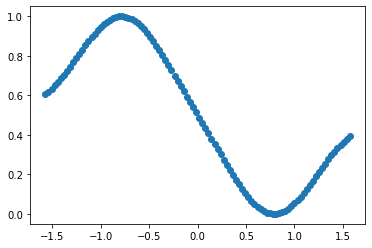

In [4]:
plt.plot(x_qnn, y, 'o')
plt.show()

### Training Models

In [5]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(5)):
    qnn = sequential_qnn(n_qubits = [1, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 10000)
    
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_1"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09710360992010132
epoch: 1, loss: 0.09014273076018783
epoch: 2, loss: 0.08578024780082348
epoch: 3, loss: 0.07793310813512677
epoch: 4, loss: 0.07192003138881381
epoch: 5, loss: 0.06548785819818813
epoch: 6, loss: 0.061731348043349135
epoch: 7, loss: 0.057307423406688394
epoch: 8, loss: 0.05268394195057945
epoch: 9, loss: 0.04787923706050479
epoch: 10, loss: 0.042510512797828935
epoch: 11, loss: 0.03681107494035281
epoch: 12, loss: 0.032672477289998204
epoch: 13, loss: 0.028735383763195205
epoch: 14, loss: 0.026329717465544022
epoch: 15, loss: 0.025288251421505436
epoch: 16, loss: 0.024371641813306196
epoch: 17, loss: 0.022412818975749954
epoch: 18, loss: 0.019701093528496624
epoch: 19, loss: 0.015499505159650267
epoch: 20, loss: 0.011305870339045294
epoch: 21, loss: 0.007987567748858612
epoch: 22, loss: 0.0066913147578221924
epoch: 23, loss: 0.0069246752438976355
epoch: 24, loss: 0.007154679574156833
epoch: 25, loss: 0.00706928862231808
epoch: 26, loss: 0.00682426933

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.1698358314767118
epoch: 1, loss: 0.13194601763948655
epoch: 2, loss: 0.1018464501168202
epoch: 3, loss: 0.07965330206097451
epoch: 4, loss: 0.06255674833900148
epoch: 5, loss: 0.05508323137012289
epoch: 6, loss: 0.05299872954525948
epoch: 7, loss: 0.04811109900150293
epoch: 8, loss: 0.04210490774321551
epoch: 9, loss: 0.03596176460198606
epoch: 10, loss: 0.029640408112776462
epoch: 11, loss: 0.02409151579618667
epoch: 12, loss: 0.023623466744578984
epoch: 13, loss: 0.02660662289108878
epoch: 14, loss: 0.030969990316971133
epoch: 15, loss: 0.03325933256946927
epoch: 16, loss: 0.03180002874720861
epoch: 17, loss: 0.029011136500791155
epoch: 18, loss: 0.02523810508461821
epoch: 19, loss: 0.023847635203040812
epoch: 20, loss: 0.022500674033571554
epoch: 21, loss: 0.021612125016831133
epoch: 22, loss: 0.020272646730830717
epoch: 23, loss: 0.019366005997422123
epoch: 24, loss: 0.019326344816396994
epoch: 25, loss: 0.018000702753584185
epoch: 26, loss: 0.01742628978727816
ep

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.03326871928316099
epoch: 1, loss: 0.029637140191057235
epoch: 2, loss: 0.02485857361003139
epoch: 3, loss: 0.019929893970564157
epoch: 4, loss: 0.01741937204384185
epoch: 5, loss: 0.01682722354741864
epoch: 6, loss: 0.015940767586336467
epoch: 7, loss: 0.014312959250152697
epoch: 8, loss: 0.01341675214994497
epoch: 9, loss: 0.012898443765943735
epoch: 10, loss: 0.012842708891379624
epoch: 11, loss: 0.012019774843036209
epoch: 12, loss: 0.010218174339406503
epoch: 13, loss: 0.0092224769641327
epoch: 14, loss: 0.008485055215511827
epoch: 15, loss: 0.008701629727942176
epoch: 16, loss: 0.008420398803313316
epoch: 17, loss: 0.007888774267254837
epoch: 18, loss: 0.006794214726252511
epoch: 19, loss: 0.006286321901068522
epoch: 20, loss: 0.0053602101086510845
epoch: 21, loss: 0.004910071191881074
epoch: 22, loss: 0.004549122449902912
epoch: 23, loss: 0.004196786085092286
epoch: 24, loss: 0.003771464193218779
epoch: 25, loss: 0.003550510232590519
epoch: 26, loss: 0.003398123

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09231437294671947
epoch: 1, loss: 0.06989532489557854
epoch: 2, loss: 0.0594932924000197
epoch: 3, loss: 0.048406945786876585
epoch: 4, loss: 0.0378978154533093
epoch: 5, loss: 0.03287425300568644
epoch: 6, loss: 0.03199767187941622
epoch: 7, loss: 0.031068607413777864
epoch: 8, loss: 0.02944389363730924
epoch: 9, loss: 0.029749634852822015
epoch: 10, loss: 0.02890991483808234
epoch: 11, loss: 0.029110678486434304
epoch: 12, loss: 0.02748864348931948
epoch: 13, loss: 0.025584509944226123
epoch: 14, loss: 0.022119520197441372
epoch: 15, loss: 0.019045395118182203
epoch: 16, loss: 0.016183967080671265
epoch: 17, loss: 0.01423600273186901
epoch: 18, loss: 0.01402079939209361
epoch: 19, loss: 0.015723734892578577
epoch: 20, loss: 0.01735310120275416
epoch: 21, loss: 0.018650268886950393
epoch: 22, loss: 0.019046078857198324
epoch: 23, loss: 0.017908985170862035
epoch: 24, loss: 0.016565703239984096
epoch: 25, loss: 0.015759517758405308
epoch: 26, loss: 0.01533091401918859

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.16763394574496362
epoch: 1, loss: 0.13724059330031305
epoch: 2, loss: 0.12180842935489586
epoch: 3, loss: 0.11770520667533228
epoch: 4, loss: 0.11820754547203638
epoch: 5, loss: 0.11837297040535527
epoch: 6, loss: 0.11835501338401247
epoch: 7, loss: 0.11687677747579228
epoch: 8, loss: 0.11444162657298451
epoch: 9, loss: 0.1105966034376995
epoch: 10, loss: 0.105778198047728
epoch: 11, loss: 0.09969556165888925
epoch: 12, loss: 0.09194950796367252
epoch: 13, loss: 0.08346714074547011
epoch: 14, loss: 0.07313634126017245
epoch: 15, loss: 0.06485099592446714
epoch: 16, loss: 0.05755962016805709
epoch: 17, loss: 0.051252675495985764
epoch: 18, loss: 0.047165841253508256
epoch: 19, loss: 0.04332065644820639
epoch: 20, loss: 0.042686400268011584
epoch: 21, loss: 0.042316034837145244
epoch: 22, loss: 0.042886800835179366
epoch: 23, loss: 0.04035741541586584
epoch: 24, loss: 0.03564146183965786
epoch: 25, loss: 0.02991959838394108
epoch: 26, loss: 0.025075120521291298
epoch: 2

In [7]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(5)):
    qnn = sequential_qnn(n_qubits = [1, 4],
                         dim = [1, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_2"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.1990445176718433
epoch: 1, loss: 0.14387151395364386
epoch: 2, loss: 0.09373623484277616
epoch: 3, loss: 0.06678137741329557
epoch: 4, loss: 0.06555775549973668
epoch: 5, loss: 0.06812831263497056
epoch: 6, loss: 0.061119282643448
epoch: 7, loss: 0.048718800345568816
epoch: 8, loss: 0.035407853399393945
epoch: 9, loss: 0.027140184152426156
epoch: 10, loss: 0.02504313110640426
epoch: 11, loss: 0.026845172049101817
epoch: 12, loss: 0.029189919371154904
epoch: 13, loss: 0.028875388795130054
epoch: 14, loss: 0.025519562469205694
epoch: 15, loss: 0.021089017549789698
epoch: 16, loss: 0.01649619836387635
epoch: 17, loss: 0.01361443502019186
epoch: 18, loss: 0.013259263399713162
epoch: 19, loss: 0.012654351798105366
epoch: 20, loss: 0.011132888644957841
epoch: 21, loss: 0.009176583214602324
epoch: 22, loss: 0.0076194459216354146
epoch: 23, loss: 0.00690299776399492
epoch: 24, loss: 0.00728974999316413
epoch: 25, loss: 0.008139577316186093
epoch: 26, loss: 0.00886594011489264

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.06806732891987273
epoch: 1, loss: 0.048523919893759954
epoch: 2, loss: 0.03850824359235566
epoch: 3, loss: 0.03047752153860479
epoch: 4, loss: 0.02668904975101326
epoch: 5, loss: 0.021264848212545075
epoch: 6, loss: 0.017340036854786255
epoch: 7, loss: 0.01581516305574836
epoch: 8, loss: 0.013685921598050554
epoch: 9, loss: 0.012491711073738768
epoch: 10, loss: 0.011631738634800645
epoch: 11, loss: 0.009764002925389727
epoch: 12, loss: 0.007274822244455788
epoch: 13, loss: 0.006164936264467139
epoch: 14, loss: 0.006486906633319545
epoch: 15, loss: 0.007076319959365752
epoch: 16, loss: 0.006510490904491298
epoch: 17, loss: 0.005564422391737256
epoch: 18, loss: 0.004793257761674034
epoch: 19, loss: 0.003739347517184456
epoch: 20, loss: 0.0030600901295922195
epoch: 21, loss: 0.0027353583501883794
epoch: 22, loss: 0.0024264332847143827
epoch: 23, loss: 0.0022493889310988657
epoch: 24, loss: 0.0021369817699039735
epoch: 25, loss: 0.001988184321723517
epoch: 26, loss: 0.001

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.21694068639594136
epoch: 1, loss: 0.13580352319254455
epoch: 2, loss: 0.11815435459277626
epoch: 3, loss: 0.12816744043262593
epoch: 4, loss: 0.11872886541322733
epoch: 5, loss: 0.09146688297801328
epoch: 6, loss: 0.0639312843760242
epoch: 7, loss: 0.040299764934213854
epoch: 8, loss: 0.02710181041980716
epoch: 9, loss: 0.021826717816904893
epoch: 10, loss: 0.02372565966234022
epoch: 11, loss: 0.026872516886843504
epoch: 12, loss: 0.024318455531925288
epoch: 13, loss: 0.016647527758338585
epoch: 14, loss: 0.01263815735392868
epoch: 15, loss: 0.014774117846204297
epoch: 16, loss: 0.017218420845583466
epoch: 17, loss: 0.015109134049271193
epoch: 18, loss: 0.011875130048937501
epoch: 19, loss: 0.010672145942674209
epoch: 20, loss: 0.010696732936466795
epoch: 21, loss: 0.009924812220776135
epoch: 22, loss: 0.007476018647620283
epoch: 23, loss: 0.004981425909268674
epoch: 24, loss: 0.0035332455377565025
epoch: 25, loss: 0.0038344368509564087
epoch: 26, loss: 0.004762221662

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.10981365468400815
epoch: 1, loss: 0.0713347635256225
epoch: 2, loss: 0.049664292145489064
epoch: 3, loss: 0.04109782907396142
epoch: 4, loss: 0.03253042506757932
epoch: 5, loss: 0.025942639889992604
epoch: 6, loss: 0.016271182510933176
epoch: 7, loss: 0.006511704730126654
epoch: 8, loss: 0.0029969379375999676
epoch: 9, loss: 0.006953356050461051
epoch: 10, loss: 0.01052339550202905
epoch: 11, loss: 0.010822424988053731
epoch: 12, loss: 0.01026531491703031
epoch: 13, loss: 0.009137776853567306
epoch: 14, loss: 0.00692650925438545
epoch: 15, loss: 0.0035047518880892002
epoch: 16, loss: 0.002377005898644525
epoch: 17, loss: 0.002876630429227176
epoch: 18, loss: 0.0033836424607317076
epoch: 19, loss: 0.0031778940143213524
epoch: 20, loss: 0.0028655185404930484
epoch: 21, loss: 0.002317753699807831
epoch: 22, loss: 0.002248753561220693
epoch: 23, loss: 0.0026157428547240996
epoch: 24, loss: 0.0029402775708167496
epoch: 25, loss: 0.002346541116049836
epoch: 26, loss: 0.0016

In [10]:
np.random.seed(42)
dnn_list = []
for i in range(5):
    dnn = sequential_dnn(dim = [1, 6, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D"))

## 2D function

### Generate Data

In [17]:
np.random.seed(42)

n = 10
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.25, 0.75]])
var1 = np.array([[0.02, 0], [0, 0.02]])

mean2 = np.array([[0.75, 0.25]])
var2 = np.array([[0.02, 0], [0, 0.02]])

mean3 = np.array([[0.25, 0.25]])
var3 = np.array([[0.02, 0], [0, 0.02]])

mean4 = np.array([[0.75, 0.75]])
var4 = np.array([[0.02, 0], [0, 0.02]])

y = gaussian(x, mean1, var1) + gaussian(x, mean2, var2) - gaussian(x, mean3, var3) - gaussian(x, mean4, var4)


x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


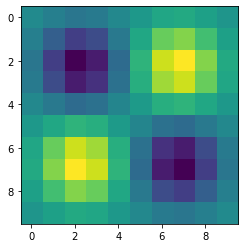

In [18]:
plt.imshow(y.reshape(n,n))
plt.show()

### Training Models

In [5]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(5)):
    qnn = sequential_qnn(n_qubits = [2, 4],
                         dim = [2, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_1"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07707288143267944
epoch: 1, loss: 0.05347516993034528
epoch: 2, loss: 0.04750162116162681
epoch: 3, loss: 0.04758920707744973
epoch: 4, loss: 0.04652063135188234
epoch: 5, loss: 0.045590747364134925
epoch: 6, loss: 0.04435377568369626
epoch: 7, loss: 0.04396006188788742
epoch: 8, loss: 0.04389305842707489
epoch: 9, loss: 0.042398918363536924
epoch: 10, loss: 0.04116334529666015
epoch: 11, loss: 0.03980305350642224
epoch: 12, loss: 0.039832020021053
epoch: 13, loss: 0.040045732715591864
epoch: 14, loss: 0.04003255086854828
epoch: 15, loss: 0.039519044818994396
epoch: 16, loss: 0.038237090256180155
epoch: 17, loss: 0.03727242003053456
epoch: 18, loss: 0.03627162353642508
epoch: 19, loss: 0.0345521884267229
epoch: 20, loss: 0.03349925869248559
epoch: 21, loss: 0.032121058045531926
epoch: 22, loss: 0.03155403742675501
epoch: 23, loss: 0.0309681466868846
epoch: 24, loss: 0.031216721532496515
epoch: 25, loss: 0.030048144986861883
epoch: 26, loss: 0.028929040818432103
epoch:

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09139942274357837
epoch: 1, loss: 0.06739328986341259
epoch: 2, loss: 0.054808855096896786
epoch: 3, loss: 0.04859066630841978
epoch: 4, loss: 0.04555004470664049
epoch: 5, loss: 0.043783925120103505
epoch: 6, loss: 0.043742559774875484
epoch: 7, loss: 0.043534208591354116
epoch: 8, loss: 0.04389242105363696
epoch: 9, loss: 0.04317879662415173
epoch: 10, loss: 0.04206608902200834
epoch: 11, loss: 0.040443167506498616
epoch: 12, loss: 0.03780917177699594
epoch: 13, loss: 0.0357544417365621
epoch: 14, loss: 0.034024433315659935
epoch: 15, loss: 0.034321178593653315
epoch: 16, loss: 0.03370172518101979
epoch: 17, loss: 0.03198233404914391
epoch: 18, loss: 0.030731872329880314
epoch: 19, loss: 0.029279486488676728
epoch: 20, loss: 0.028950173801420974
epoch: 21, loss: 0.029163241035447974
epoch: 22, loss: 0.028399976035197422
epoch: 23, loss: 0.02755482672740641
epoch: 24, loss: 0.026457816914202955
epoch: 25, loss: 0.023954101724522076
epoch: 26, loss: 0.0221586667959151

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0818436860610029
epoch: 1, loss: 0.05227985658055681
epoch: 2, loss: 0.04102115333654553
epoch: 3, loss: 0.03661306875258623
epoch: 4, loss: 0.030313943499181425
epoch: 5, loss: 0.024850236444075496
epoch: 6, loss: 0.0237595128468586
epoch: 7, loss: 0.024052030419560354
epoch: 8, loss: 0.023834564433776552
epoch: 9, loss: 0.023798707302156035
epoch: 10, loss: 0.022550895898093594
epoch: 11, loss: 0.021100411795471955
epoch: 12, loss: 0.018423164589283048
epoch: 13, loss: 0.015574490888892926
epoch: 14, loss: 0.014433969828806643
epoch: 15, loss: 0.013182628970491803
epoch: 16, loss: 0.013094004470033997
epoch: 17, loss: 0.013565027332341493
epoch: 18, loss: 0.014156237543667823
epoch: 19, loss: 0.01464674991575607
epoch: 20, loss: 0.014951066297110379
epoch: 21, loss: 0.014643741288478911
epoch: 22, loss: 0.014080782714927083
epoch: 23, loss: 0.01300353851894042
epoch: 24, loss: 0.012791103757036544
epoch: 25, loss: 0.012203792874600487
epoch: 26, loss: 0.011442212262

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07113454534259624
epoch: 1, loss: 0.057049590528421824
epoch: 2, loss: 0.049592168299606956
epoch: 3, loss: 0.0461386753224717
epoch: 4, loss: 0.04694719076786132
epoch: 5, loss: 0.0478415996091126
epoch: 6, loss: 0.04611519844965383
epoch: 7, loss: 0.04235808686439681
epoch: 8, loss: 0.03814701836569949
epoch: 9, loss: 0.03501298486862672
epoch: 10, loss: 0.033010422897775164
epoch: 11, loss: 0.03147573539462386
epoch: 12, loss: 0.029995702844883076
epoch: 13, loss: 0.028770194035054413
epoch: 14, loss: 0.025935741798315006
epoch: 15, loss: 0.022578943025275605
epoch: 16, loss: 0.01985688475355283
epoch: 17, loss: 0.018105238045464843
epoch: 18, loss: 0.018159165463205333
epoch: 19, loss: 0.018370347386983003
epoch: 20, loss: 0.018058455769749977
epoch: 21, loss: 0.017473075163593282
epoch: 22, loss: 0.01603939027524971
epoch: 23, loss: 0.016629731343978615
epoch: 24, loss: 0.016335377234348376
epoch: 25, loss: 0.01657399625096061
epoch: 26, loss: 0.01619977480306813

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.05777436789447741
epoch: 1, loss: 0.046669687978172884
epoch: 2, loss: 0.03972220341788151
epoch: 3, loss: 0.033648442465327486
epoch: 4, loss: 0.028877377541569646
epoch: 5, loss: 0.02863055580422421
epoch: 6, loss: 0.027645089944255758
epoch: 7, loss: 0.02523548280106644
epoch: 8, loss: 0.022491375843832442
epoch: 9, loss: 0.022088123717709466
epoch: 10, loss: 0.02279443995018955
epoch: 11, loss: 0.02115757032663486
epoch: 12, loss: 0.018336860897053442
epoch: 13, loss: 0.016482962177508977
epoch: 14, loss: 0.015503319102594355
epoch: 15, loss: 0.015041786914364865
epoch: 16, loss: 0.013779450861232384
epoch: 17, loss: 0.014731245416494655
epoch: 18, loss: 0.015390845296676448
epoch: 19, loss: 0.015429647816355856
epoch: 20, loss: 0.014906614055274752
epoch: 21, loss: 0.0144047912181417
epoch: 22, loss: 0.0140653632918351
epoch: 23, loss: 0.013463965972732483
epoch: 24, loss: 0.013184379224995895
epoch: 25, loss: 0.014066342547756657
epoch: 26, loss: 0.0143795938751

In [6]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(5)):
    qnn = sequential_qnn(n_qubits = [2, 4],
                         dim = [2, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_2"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07937633355613255
epoch: 1, loss: 0.03831498798896587
epoch: 2, loss: 0.022181347978365563
epoch: 3, loss: 0.022638149266011886
epoch: 4, loss: 0.023110576645042676
epoch: 5, loss: 0.01900290836112219
epoch: 6, loss: 0.01619841082237681
epoch: 7, loss: 0.017963479269358425
epoch: 8, loss: 0.020679277500450875
epoch: 9, loss: 0.021325617229711828
epoch: 10, loss: 0.019190768738916314
epoch: 11, loss: 0.01678060026156439
epoch: 12, loss: 0.014724096251143135
epoch: 13, loss: 0.014157229925133493
epoch: 14, loss: 0.014338039761602837
epoch: 15, loss: 0.0146181621302701
epoch: 16, loss: 0.01357091357107778
epoch: 17, loss: 0.012794505041668045
epoch: 18, loss: 0.011540472281133222
epoch: 19, loss: 0.010606045258833137
epoch: 20, loss: 0.009685256845204819
epoch: 21, loss: 0.009212734795578364
epoch: 22, loss: 0.009110438123617426
epoch: 23, loss: 0.008610076578288973
epoch: 24, loss: 0.008443125709544983
epoch: 25, loss: 0.008088401116752943
epoch: 26, loss: 0.00783125597

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.045130877534361666
epoch: 1, loss: 0.04078285563424625
epoch: 2, loss: 0.035327185583971195
epoch: 3, loss: 0.030214227651706605
epoch: 4, loss: 0.026523138821400876
epoch: 5, loss: 0.025505841068935133
epoch: 6, loss: 0.023902789410926273
epoch: 7, loss: 0.021795474183066817
epoch: 8, loss: 0.019073834581141834
epoch: 9, loss: 0.017768475047005575
epoch: 10, loss: 0.017176467625918304
epoch: 11, loss: 0.017686899981357255
epoch: 12, loss: 0.017910946193565345
epoch: 13, loss: 0.017282482085746887
epoch: 14, loss: 0.016610400611914225
epoch: 15, loss: 0.01670650814662048
epoch: 16, loss: 0.01646466363321694
epoch: 17, loss: 0.01626753122117886
epoch: 18, loss: 0.015428422923771046
epoch: 19, loss: 0.01553362177255313
epoch: 20, loss: 0.01498128493155369
epoch: 21, loss: 0.014034031043599172
epoch: 22, loss: 0.013510351750876996
epoch: 23, loss: 0.01254256175608165
epoch: 24, loss: 0.01213125826909472
epoch: 25, loss: 0.011186356944513713
epoch: 26, loss: 0.01075674138

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.11789436944906327
epoch: 1, loss: 0.0742881764016224
epoch: 2, loss: 0.05249914884598337
epoch: 3, loss: 0.04100468334745435
epoch: 4, loss: 0.03610031254903457
epoch: 5, loss: 0.03538791948336799
epoch: 6, loss: 0.03679953170333918
epoch: 7, loss: 0.03390065641908169
epoch: 8, loss: 0.028974342203911124
epoch: 9, loss: 0.025399484022835938
epoch: 10, loss: 0.022932609180386594
epoch: 11, loss: 0.02037875377916149
epoch: 12, loss: 0.018423114253061163
epoch: 13, loss: 0.018828174893483374
epoch: 14, loss: 0.01919151851900834
epoch: 15, loss: 0.019626548150269346
epoch: 16, loss: 0.018803566194972143
epoch: 17, loss: 0.018393596938075338
epoch: 18, loss: 0.018279029832357664
epoch: 19, loss: 0.016819745398555
epoch: 20, loss: 0.016021620707307786
epoch: 21, loss: 0.015409655682212248
epoch: 22, loss: 0.01513699841972686
epoch: 23, loss: 0.014330410548354098
epoch: 24, loss: 0.013881287959243104
epoch: 25, loss: 0.013137042020910148
epoch: 26, loss: 0.012589923919628161

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.05114791188061397
epoch: 1, loss: 0.04104214211221406
epoch: 2, loss: 0.035705847398019755
epoch: 3, loss: 0.028444536239311594
epoch: 4, loss: 0.02429593041596409
epoch: 5, loss: 0.023053987967716676
epoch: 6, loss: 0.02109300876422965
epoch: 7, loss: 0.01907533054539317
epoch: 8, loss: 0.01592855504544096
epoch: 9, loss: 0.013774576152485032
epoch: 10, loss: 0.011796139531352329
epoch: 11, loss: 0.011613729098660234
epoch: 12, loss: 0.012608827614803631
epoch: 13, loss: 0.011525611862898006
epoch: 14, loss: 0.009615719486887126
epoch: 15, loss: 0.008646069420437812
epoch: 16, loss: 0.008642649273263654
epoch: 17, loss: 0.00849098449623631
epoch: 18, loss: 0.0084149190350387
epoch: 19, loss: 0.007872313406754986
epoch: 20, loss: 0.008025451410247662
epoch: 21, loss: 0.008491198804811062
epoch: 22, loss: 0.008092520639824385
epoch: 23, loss: 0.007520947116020293
epoch: 24, loss: 0.0072686241903459825
epoch: 25, loss: 0.007255617372966094
epoch: 26, loss: 0.00710470332

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.06276859183560227
epoch: 1, loss: 0.0466465029227157
epoch: 2, loss: 0.03956829697186236
epoch: 3, loss: 0.0345501490310497
epoch: 4, loss: 0.03290597863875298
epoch: 5, loss: 0.03081730381331249
epoch: 6, loss: 0.027388127825309905
epoch: 7, loss: 0.022565122000280886
epoch: 8, loss: 0.01742287216648025
epoch: 9, loss: 0.015369933627191735
epoch: 10, loss: 0.014546891178920768
epoch: 11, loss: 0.01359177925219618
epoch: 12, loss: 0.013014051231711494
epoch: 13, loss: 0.012791024741424547
epoch: 14, loss: 0.011502623492700542
epoch: 15, loss: 0.011018704104254954
epoch: 16, loss: 0.011099848205605256
epoch: 17, loss: 0.01141252944831028
epoch: 18, loss: 0.011258814624319179
epoch: 19, loss: 0.010813424799016045
epoch: 20, loss: 0.009967922628004106
epoch: 21, loss: 0.01016548218086957
epoch: 22, loss: 0.010154242479049084
epoch: 23, loss: 0.009728654398210947
epoch: 24, loss: 0.00896061484020562
epoch: 25, loss: 0.008953314335836451
epoch: 26, loss: 0.0087843764514736

In [19]:
np.random.seed(42)
dnn_list = []
for i in range(5):
    dnn = sequential_dnn(dim = [2, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D"))

## 3D function

### Generate Data

In [20]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(216, 1)


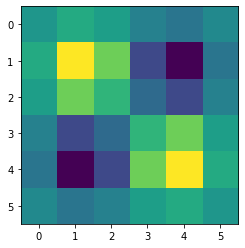

In [8]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [12]:
np.random.seed(42)

qnn_list = []

for i in tqdm(range(5)):
    qnn = sequential_qnn(n_qubits = [3, 4],
                         dim = [3, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_1"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.04828635228112989
epoch: 1, loss: 0.039003136881437035
epoch: 2, loss: 0.029496646531267354
epoch: 3, loss: 0.024680934660924508
epoch: 4, loss: 0.02370861397163775
epoch: 5, loss: 0.021681424622808657
epoch: 6, loss: 0.020237098923040864
epoch: 7, loss: 0.020047640040227795
epoch: 8, loss: 0.02109565307689766
epoch: 9, loss: 0.021641388993428844
epoch: 10, loss: 0.021250484936363438
epoch: 11, loss: 0.02022185119244297
epoch: 12, loss: 0.01984687965024265
epoch: 13, loss: 0.01925961254614399
epoch: 14, loss: 0.01884384157852344
epoch: 15, loss: 0.018153699699137684
epoch: 16, loss: 0.01751385148260749
epoch: 17, loss: 0.016975974283520264
epoch: 18, loss: 0.016286735169088035
epoch: 19, loss: 0.01582295646482196
epoch: 20, loss: 0.015213847285576489
epoch: 21, loss: 0.014812497507999116
epoch: 22, loss: 0.014439676248223697
epoch: 23, loss: 0.014300637526061736
epoch: 24, loss: 0.014297931271826452
epoch: 25, loss: 0.014144155043437167
epoch: 26, loss: 0.014080351371

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.027373987026830318
epoch: 1, loss: 0.023865530387788523
epoch: 2, loss: 0.02396405943182518
epoch: 3, loss: 0.024003636032097538
epoch: 4, loss: 0.023723092578236266
epoch: 5, loss: 0.023464809717404545
epoch: 6, loss: 0.0230281851408667
epoch: 7, loss: 0.022883442540642514
epoch: 8, loss: 0.02309465553671925
epoch: 9, loss: 0.0226736932461601
epoch: 10, loss: 0.022454284324954724
epoch: 11, loss: 0.022454002516402675
epoch: 12, loss: 0.02209171733328152
epoch: 13, loss: 0.022049226929994715
epoch: 14, loss: 0.02209204668360812
epoch: 15, loss: 0.02186375758649878
epoch: 16, loss: 0.02170960611924149
epoch: 17, loss: 0.021588606800001225
epoch: 18, loss: 0.021480286213591
epoch: 19, loss: 0.021105385508172207
epoch: 20, loss: 0.020867124768861926
epoch: 21, loss: 0.020495383729718823
epoch: 22, loss: 0.020073461267137802
epoch: 23, loss: 0.019683552280592768
epoch: 24, loss: 0.0193033880419981
epoch: 25, loss: 0.018755735296747164
epoch: 26, loss: 0.018665010745659263

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0601551539779326
epoch: 1, loss: 0.03563271557047814
epoch: 2, loss: 0.02516591846432895
epoch: 3, loss: 0.025611484030789493
epoch: 4, loss: 0.027455318490158896
epoch: 5, loss: 0.027192751698490388
epoch: 6, loss: 0.025569882424917503
epoch: 7, loss: 0.023631691766179883
epoch: 8, loss: 0.02327740780562598
epoch: 9, loss: 0.02350182075680447
epoch: 10, loss: 0.022449447577875422
epoch: 11, loss: 0.022250191232044428
epoch: 12, loss: 0.02212504126852792
epoch: 13, loss: 0.022286398469261164
epoch: 14, loss: 0.022394376891036984
epoch: 15, loss: 0.022491718670563907
epoch: 16, loss: 0.022028847788739352
epoch: 17, loss: 0.021681446161133138
epoch: 18, loss: 0.021445553020734972
epoch: 19, loss: 0.02131791312395241
epoch: 20, loss: 0.021143003080116393
epoch: 21, loss: 0.020839339660628696
epoch: 22, loss: 0.020666053445082547
epoch: 23, loss: 0.020557875994479
epoch: 24, loss: 0.020421687454394523
epoch: 25, loss: 0.020302989154800888
epoch: 26, loss: 0.02031054650060

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.03095132612025051
epoch: 1, loss: 0.024798424670677523
epoch: 2, loss: 0.022164461854125902
epoch: 3, loss: 0.021374884271252222
epoch: 4, loss: 0.02101816834544885
epoch: 5, loss: 0.02130689551339093
epoch: 6, loss: 0.021211236013415197
epoch: 7, loss: 0.021290070188415205
epoch: 8, loss: 0.02109942695657668
epoch: 9, loss: 0.02077832948395953
epoch: 10, loss: 0.02049639651704642
epoch: 11, loss: 0.02022592713633587
epoch: 12, loss: 0.019848139513299987
epoch: 13, loss: 0.019210471269134693
epoch: 14, loss: 0.018719439112090848
epoch: 15, loss: 0.01771200459672875
epoch: 16, loss: 0.017284774092966606
epoch: 17, loss: 0.016550558934557487
epoch: 18, loss: 0.015927316255155012
epoch: 19, loss: 0.015056146116962255
epoch: 20, loss: 0.01408154941696406
epoch: 21, loss: 0.013343285399896484
epoch: 22, loss: 0.012047296174685621
epoch: 23, loss: 0.011553118586613826
epoch: 24, loss: 0.011672013282149498
epoch: 25, loss: 0.011964185019031915
epoch: 26, loss: 0.012104819680

In [13]:
np.random.seed(42)

#qnn_list = []
qnn_list = loader(data_path("trainability_qnn_3D_reps_2"))
qnn = sequential_qnn(n_qubits = [3, 4],
                         dim = [3, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 10000)
for i in tqdm(range(1, 5)):
    qnn = sequential_qnn(n_qubits = [3, 4],
                         dim = [3, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 10000)
    qnn.train(x_qnn, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_2"))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0559680857593431
epoch: 1, loss: 0.03697720125268838
epoch: 2, loss: 0.029110854947261317
epoch: 3, loss: 0.027519070960164635
epoch: 4, loss: 0.027437093398845497
epoch: 5, loss: 0.025969801228769265
epoch: 6, loss: 0.02478083753547045
epoch: 7, loss: 0.02353019392434656
epoch: 8, loss: 0.023454347143725844
epoch: 9, loss: 0.022957857992989356
epoch: 10, loss: 0.02260987467836544
epoch: 11, loss: 0.022117242386954145
epoch: 12, loss: 0.021344281178992532
epoch: 13, loss: 0.020591478490406635
epoch: 14, loss: 0.019391180399898
epoch: 15, loss: 0.018354423895041265
epoch: 16, loss: 0.01734337884774248
epoch: 17, loss: 0.016856865749051826
epoch: 18, loss: 0.016287188163814297
epoch: 19, loss: 0.015607808223159488
epoch: 20, loss: 0.01469759367411915
epoch: 21, loss: 0.014160169933169752
epoch: 22, loss: 0.013600173031524445
epoch: 23, loss: 0.013574026157707277
epoch: 24, loss: 0.013600638392159983
epoch: 25, loss: 0.0133917226040653
epoch: 26, loss: 0.0133412110745356

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.06755964287836769
epoch: 1, loss: 0.04490714015210805
epoch: 2, loss: 0.03489692667031402
epoch: 3, loss: 0.028188616669126212
epoch: 4, loss: 0.025141431643925252
epoch: 5, loss: 0.02385159823807526
epoch: 6, loss: 0.02207210016643366
epoch: 7, loss: 0.01970727203855447
epoch: 8, loss: 0.018026648974424356
epoch: 9, loss: 0.017911756400759943
epoch: 10, loss: 0.01796783305775529
epoch: 11, loss: 0.018105623200982305
epoch: 12, loss: 0.018039550172714133
epoch: 13, loss: 0.017873318213373384
epoch: 14, loss: 0.01752620650303811
epoch: 15, loss: 0.017596440355907215
epoch: 16, loss: 0.01713711216301002
epoch: 17, loss: 0.01637159399666957
epoch: 18, loss: 0.01609051379570409
epoch: 19, loss: 0.015422499066593036
epoch: 20, loss: 0.015269309580684589
epoch: 21, loss: 0.01481720082477519
epoch: 22, loss: 0.014914003539802457
epoch: 23, loss: 0.014589961160458634
epoch: 24, loss: 0.014292691257619509
epoch: 25, loss: 0.013973661217809786
epoch: 26, loss: 0.014049337400287

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.04059234572849378
epoch: 1, loss: 0.0316712356615862
epoch: 2, loss: 0.026685221287336948
epoch: 3, loss: 0.024133895811833603
epoch: 4, loss: 0.022974461630389447
epoch: 5, loss: 0.022737244903550773
epoch: 6, loss: 0.02263900396234762
epoch: 7, loss: 0.022462883376004213
epoch: 8, loss: 0.02284533738809455
epoch: 9, loss: 0.022490887898493832
epoch: 10, loss: 0.021785127814804725
epoch: 11, loss: 0.02064050723997925
epoch: 12, loss: 0.01994356688278618
epoch: 13, loss: 0.018958335934190204
epoch: 14, loss: 0.017602603720367378
epoch: 15, loss: 0.01650989633411805
epoch: 16, loss: 0.016668249877396783
epoch: 17, loss: 0.01758529854558406
epoch: 18, loss: 0.017034636136536656
epoch: 19, loss: 0.01639211081969097
epoch: 20, loss: 0.01614792455316816
epoch: 21, loss: 0.016278111311023694
epoch: 22, loss: 0.015977938186388627
epoch: 23, loss: 0.01549540079633537
epoch: 24, loss: 0.015364310265633594
epoch: 25, loss: 0.015070098715183614
epoch: 26, loss: 0.014816333531954

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.1044222303092689
epoch: 1, loss: 0.07334983570893071
epoch: 2, loss: 0.051172396756700156
epoch: 3, loss: 0.03859759813331862
epoch: 4, loss: 0.03398470419966841
epoch: 5, loss: 0.030625043959947234
epoch: 6, loss: 0.02878904248960087
epoch: 7, loss: 0.025853389596946837
epoch: 8, loss: 0.024232147013521214
epoch: 9, loss: 0.023719398592013125
epoch: 10, loss: 0.024258527261899497
epoch: 11, loss: 0.025295094086788126
epoch: 12, loss: 0.025252957302986937
epoch: 13, loss: 0.024142237958233875
epoch: 14, loss: 0.022745504034572355
epoch: 15, loss: 0.021462703751256494
epoch: 16, loss: 0.021251909735481803
epoch: 17, loss: 0.021136466251326744
epoch: 18, loss: 0.020582168283697685
epoch: 19, loss: 0.020271553783186326
epoch: 20, loss: 0.01990497206002511
epoch: 21, loss: 0.019265554775448928
epoch: 22, loss: 0.018994003992204696
epoch: 23, loss: 0.018995421524535174
epoch: 24, loss: 0.01883492430207659
epoch: 25, loss: 0.01873105978650828
epoch: 26, loss: 0.018382842855

In [24]:
np.random.seed(42)
dnn_list = []
for i in range(5):
    dnn = sequential_dnn(dim = [3, 6, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D"))

### Deep QKN

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0, b=1)

In [ ]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [ ]:
np.random.seed(42)


qnn = sequential_qnn(q_bits = [3, 4, 4],
                     dim = [3, 4, 4, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

qnn.train(x, y, epochs=200, verbose=True)
    
saver(qnn, data_path("trainability_qnn_3D_deep"))

In [ ]:
x = scaler(x, mode="standard")

dnn = sequential_dnn(dim = [3, 6, 5, 1], lr = 0.1)

dnn.train(x, y, epochs=1000, verbose=True)

In [ ]:
plt.plot(qnn.loss)
plt.plot(dnn.loss)
plt.show()

### Hybrid Neural Network

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=-2, b=2)

In [ ]:
np.random.seed(42)

layer1 = QLayer(n_qubits=3, n_features=3, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), sampler=Parity(), reps=2, scale=1, backend=backend, shots=10000)
layer2 = Dense(n_features=3, n_targets=1, activation=Identity())
layers = [layer1, layer2]
network = NeuralNetwork(layers=layers, optimizer = Adam(lr=0.1))

In [ ]:
network.train(x, y, epochs=100, verbose=True)
saver(network, data_path("trainability_hybrid_2_layer"))

## Single Circuit

In [ ]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.02) - gaussian(x, 0.7, 0.02) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)


In [ ]:
plt.plot(x,y)

In [ ]:
qnn = sequential_qnn(q_bits = [3],
                         dim = [3, 1],
                         reps = 3,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)

In [ ]:
qnn.train(x, y, verbose=True)